In [1]:
using LinearAlgebra, BenchmarkTools, LaTeXStrings, Plots

In [30]:
function ode_rk2(f::Function, t1::Real, x1::Vector{<:Real}, Npoints::Integer, h = 1.0e-6) 
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x1), length(tn)))
    xn[:,1] = x1
    for i in 1:(Npoints-1)
        k1 = f(tn[i], xn[:,i])
        k2 = f(tn[i] + h/2, xn[:, i] .+ k1.*(h/2))
        xn[:, i+1] = xn[:,i] .+ (k1 .+ k2) .*(h/2)
    end 
    return tn, xn
end

function ode_rk4(f::Function, t1::Real, x1::Vector{<:Real}, Npoints::Integer, h = 1.0e-6) 
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x1), length(tn)))
    xn[:,1] = x1
    for i in 1:(Npoints-1)
        k1 = f(tn[i], xn[:, i])
        k2 = f(tn[i] + h/2, xn[:, i] .+ k1.*(h/2))
        k3 = f(tn[i] + h/2, xn[:,i] .+ k2 .*(h/2))
        k4 = f(tn[i] + h, xn[:, i] .+ k3 .* h)
        xn[:, i+1] = xn[:, i] .+ (k1 .+ (2.0 .* k2) .+ (2.0 .* k3) .+ k4).*(h/6)
    end
    return tn, xn
end


ode_rk4 (generic function with 2 methods)

In [31]:
function butterfly3d(v, σ::Real, ρ::Real, β::Real)
    return [σ*(v[2]-v[1]), v[1]*(ρ - v[3])-v[2], v[1]*v[2]-β*v[3]]
end

butterfly3d (generic function with 1 method)

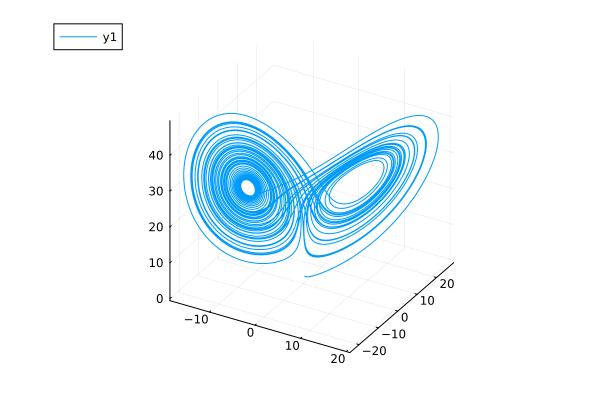

In [32]:
tn, xn = ode_rk2((t, x)->butterfly3d(x, 10, 28, 8/3), 0.0, [0.0, 1.0, 1.0], 50000, 1.0e-3)
plot(xn[1,:], xn[2,:], xn[3,:])

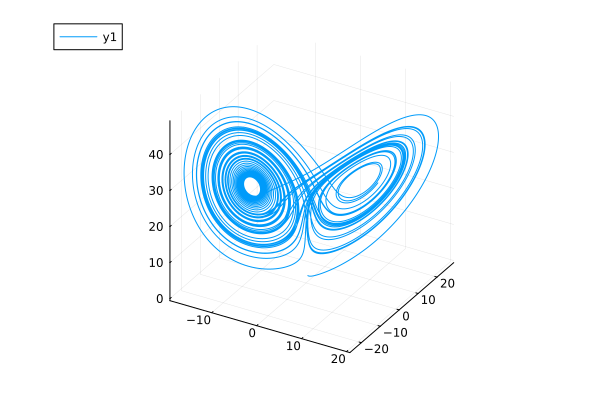

In [34]:
tn, xn = ode_rk4((t, x)->butterfly3d(x, 10, 28, 8/3), 0.0, [0.0, 1.0, 1.0], 50000, 1.0e-3)
plot(xn[1,:], xn[2,:], xn[3,:])